# Basic setups


In [1]:
import numpy as np
import matplotlib.pyplot as plt

LHS = np.array([
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,0],
    [0,0,2,0,0],
    [0,0,0,0,1],
    [1,0,0,1,0],
    [0,0,0,0,1]] , dtype=float)

RHS = np.array([
    [1,1,0,0,0],
    [0,1,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,1,0],
    [0,0,0,0,0],
    [0,0,0,0,1],
    [1,0,0,1,0]] , dtype=float)

ell_effects = RHS - LHS


# Initial conditions and rate constants
initial_state1 = [1, 10, 50, 10, 0]
initial_state2 = [20, 200, 1000, 200, 0]
rate_constants1 = np.array([200, 10, 25, 1, 0.01, 10, 0, 0])  # First scenario
rate_constants2 = np.array([200, 10, 25, 1, 0.01, 10, 2, .1])  # Second scenario

# Next Reaction

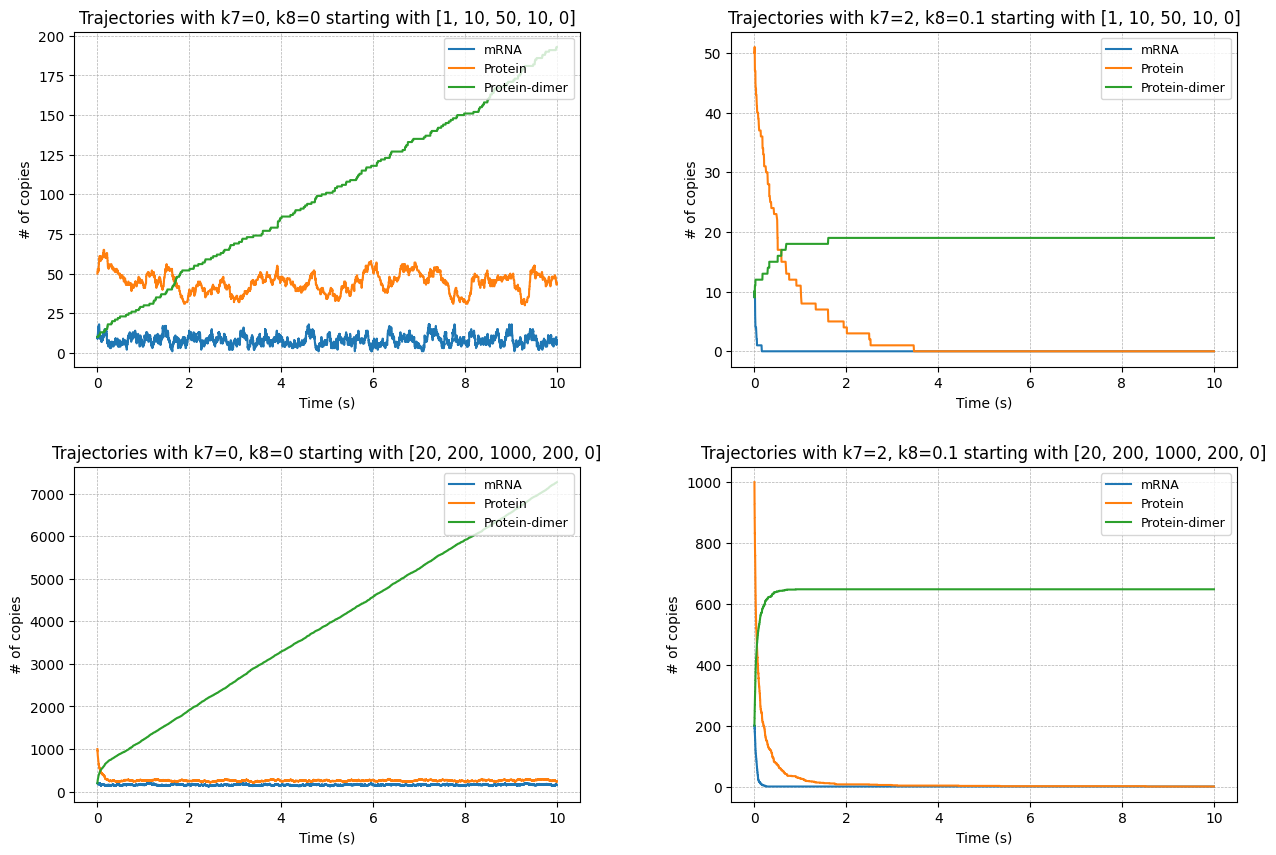

In [2]:

def lambdas(X , rates):
    lambdas = np.array([rates[0]*X[0] , rates[1]*X[1] , rates[2]*X[1] , rates[3]*X[2] , rates[4]*X[2]*(X[2]-1) , rates[5]*X[3] , rates[6]*X[0]*X[3] , rates[7]*X[4]])
    return np.maximum(lambdas,1e-16)
    # return lambdas

# def tau(times , states , rates):
#     res = np.zeros(8)
#     for i in range(1,len(times)):
#         res += lambdas(states[i-1] , rates) * (times[i] - times[i-1])
#     return res

# Simulation function
def simulate_reactions(initial_state, rate_constants, max_time , effects):
    X = np.array(initial_state, dtype=float)
    current_time = 0
    times = [current_time]
    states = [X.copy()]
    T_j  = np.random.exponential(1,8)
    tau = np.zeros(8)
    while current_time < max_time:
        rates = lambdas(X,rate_constants)
        next_reaction_waitting_times = np.divide(T_j - tau, rates)
        l_star = np.argmin(next_reaction_waitting_times)
        # if np.divide(T_j - tau, rates)[l_star] < 0:
        #     print(current_time , 'fuck')
        next_reaction_waitting_time = next_reaction_waitting_times[l_star] 
        current_time += next_reaction_waitting_time
        times.append(current_time)
        tau += rates * next_reaction_waitting_time
        X += effects[l_star]
        states.append(X.copy())
        T_j[l_star] += np.random.exponential(1)
    return np.array(times), np.array(states)

# Simulate
times1, states1 = simulate_reactions(initial_state1, rate_constants1, 10  , ell_effects)
times2, states2 = simulate_reactions(initial_state1, rate_constants2, 10  , ell_effects)
times3, states3 = simulate_reactions(initial_state2, rate_constants1, 10  , ell_effects)
times4, states4 = simulate_reactions(initial_state2, rate_constants2, 10  , ell_effects)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Adjust figure size
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust space between plots

# Define a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # More pleasing color palette

# Iterate over each subplot to reduce redundancy in the code
data_indices = [(0, 0, times1, states1), (0, 1, times2, states2), (1, 0, times3, states3), (1, 1, times4, states4)]
labels = ['mRNA', 'Protein', 'Protein-dimer']
titles = [
    f'Trajectories with k7=0, k8=0 starting with {initial_state1}',
    f'Trajectories with k7=2, k8=0.1 starting with {initial_state1}',
    f'Trajectories with k7=0, k8=0 starting with {initial_state2}',
    f'Trajectories with k7=2, k8=0.1 starting with {initial_state2}'
]

for i, (row, col, times, states) in enumerate(data_indices):
    ax = axes[row, col]
    for j, label in enumerate(labels):
        ax.plot(times, states[:, j+1], label=label, color=colors[j], linestyle='-')
    ax.set_title(titles[i], fontsize=12)
    ax.set_xlabel('Time (s)', fontsize=10)
    ax.set_ylabel('# of copies', fontsize=10)
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()





# Gillespie scheme

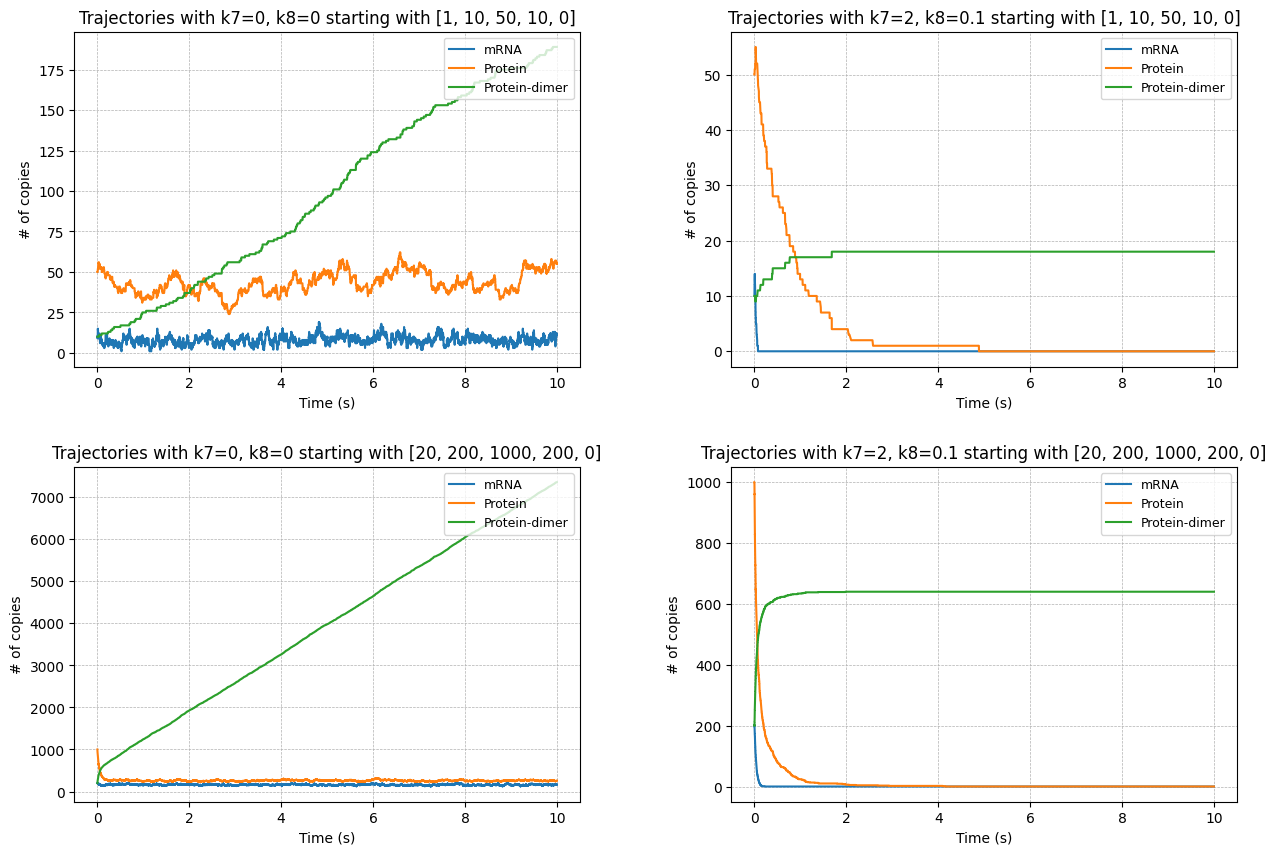

In [3]:

def lambdas(X , rates):
    lambdas = np.array([rates[0]*X[0] , rates[1]*X[1] , rates[2]*X[1] , rates[3]*X[2] , rates[4]*X[2]*(X[2]-1) , rates[5]*X[3] , rates[6]*X[0]*X[3] , rates[7]*X[4]])
    return np.maximum(lambdas,1e-16)
    # return lambdas

# def tau(times , states , rates):
#     res = np.zeros(8)
#     for i in range(1,len(times)):
#         res += lambdas(states[i-1] , rates) * (times[i] - times[i-1])
#     return res

# Simulation function
def simulate_Gill(initial_state, rate_constants, max_time , effects):
    X = np.array(initial_state, dtype=float)
    current_time = 0
    times = [current_time]
    states = [X.copy()]

    while current_time < max_time:
        Lams = lambdas(X , rate_constants)
        current_time += np.random.exponential(1 / Lams.sum())
        
        l_star = np.random.choice(a=range(8) , p=Lams / (Lams.sum()))
        X += effects[l_star]

        times.append(current_time)
        states.append(X.copy())
    return np.array(times), np.array(states)

# Simulate
times1, states1 = simulate_Gill(initial_state1, rate_constants1, 10  , ell_effects)
times2, states2 = simulate_Gill(initial_state1, rate_constants2, 10  , ell_effects)
times3, states3 = simulate_Gill(initial_state2, rate_constants1, 10  , ell_effects)
times4, states4 = simulate_Gill(initial_state2, rate_constants2, 10  , ell_effects)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Adjust figure size
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust space between plots

# Define a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # More pleasing color palette

# Iterate over each subplot to reduce redundancy in the code
data_indices = [(0, 0, times1, states1), (0, 1, times2, states2), (1, 0, times3, states3), (1, 1, times4, states4)]
labels = ['mRNA', 'Protein', 'Protein-dimer']
titles = [
    f'Trajectories with k7=0, k8=0 starting with {initial_state1}',
    f'Trajectories with k7=2, k8=0.1 starting with {initial_state1}',
    f'Trajectories with k7=0, k8=0 starting with {initial_state2}',
    f'Trajectories with k7=2, k8=0.1 starting with {initial_state2}'
]

for i, (row, col, times, states) in enumerate(data_indices):
    ax = axes[row, col]
    for j, label in enumerate(labels):
        ax.plot(times, states[:, j+1], label=label, color=colors[j], linestyle='-')
    ax.set_title(titles[i], fontsize=12)
    ax.set_xlabel('Time (s)', fontsize=10)
    ax.set_ylabel('# of copies', fontsize=10)
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()



# Tau-leaping

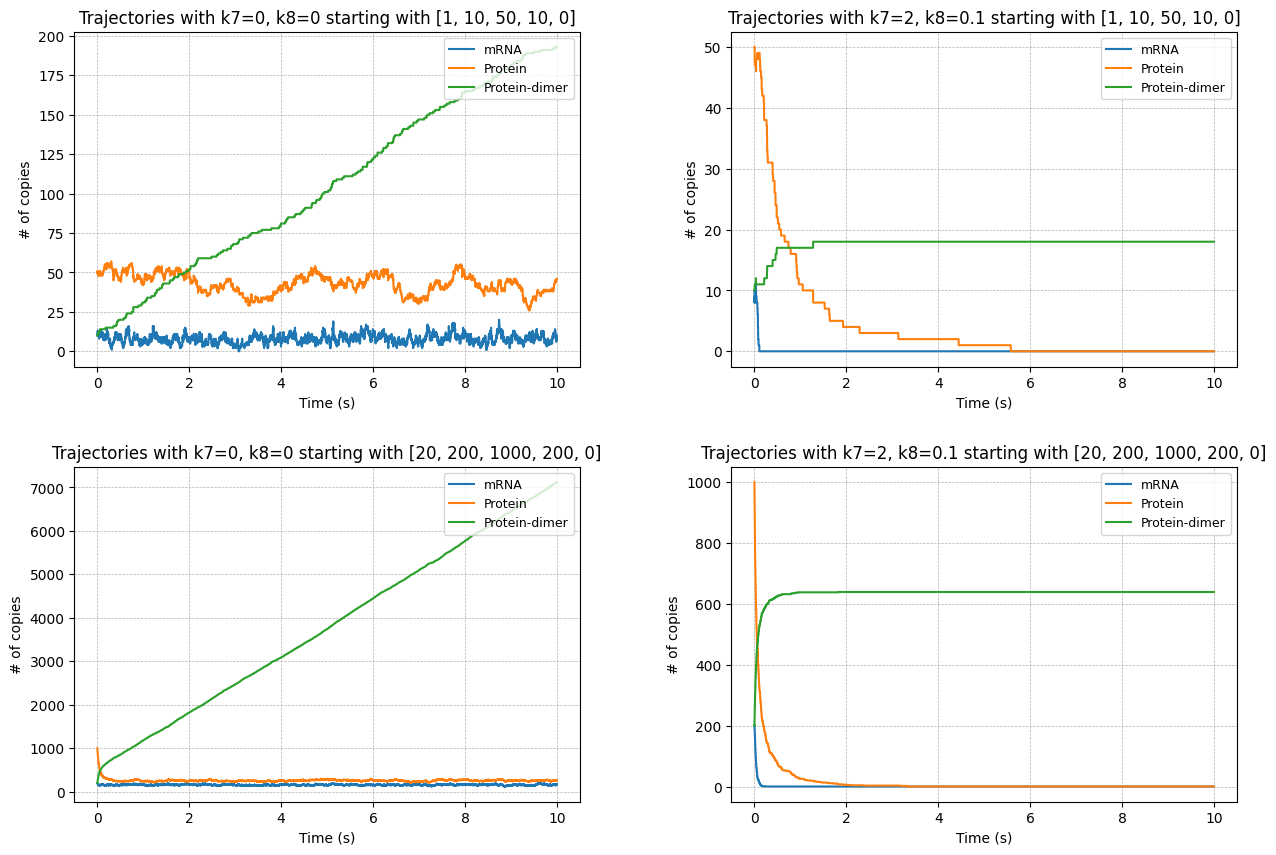

In [4]:
def lambdas(X , rates):
    lambdas = np.array([rates[0]*X[0] , rates[1]*X[1] , rates[2]*X[1] , rates[3]*X[2] , rates[4]*X[2]*(X[2]-1) , rates[5]*X[3] , rates[6]*X[0]*X[3] , rates[7]*X[4]])
    return np.maximum(lambdas,1e-16)
    # return lambdas

# def tau(times , states , rates):
#     res = np.zeros(8)
#     for i in range(1,len(times)):
#         res += lambdas(states[i-1] , rates) * (times[i] - times[i-1])
#     return res

# Simulation function
def simulate_tau_leaping(initial_state, rate_constants, max_time , effects , h):
    X = np.array(initial_state, dtype=float)
    current_time = 0
    times = [0]
    states = [X.copy()]
    while current_time < max_time:
        current_time += h
        times.append(current_time)
        rates = lambdas(X , rate_constants)
        events = np.random.poisson(rates * h)
        X += effects.T@events
        states.append(X.copy())
        
    return np.array(times), np.array(states)

# Simulate
times1, states1 = simulate_tau_leaping(initial_state1, rate_constants1, 10  , ell_effects , h = 1e-4)
times2, states2 = simulate_tau_leaping(initial_state1, rate_constants2, 10  , ell_effects , h = 1e-4)
times3, states3 = simulate_tau_leaping(initial_state2, rate_constants1, 10  , ell_effects , h = 1e-4)
times4, states4 = simulate_tau_leaping(initial_state2, rate_constants2, 10  , ell_effects , h = 1e-4)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Adjust figure size
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust space between plots

# Define a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # More pleasing color palette

# Iterate over each subplot to reduce redundancy in the code
data_indices = [(0, 0, times1, states1), (0, 1, times2, states2), (1, 0, times3, states3), (1, 1, times4, states4)]
labels = ['mRNA', 'Protein', 'Protein-dimer']
titles = [
    f'Trajectories with k7=0, k8=0 starting with {initial_state1}',
    f'Trajectories with k7=2, k8=0.1 starting with {initial_state1}',
    f'Trajectories with k7=0, k8=0 starting with {initial_state2}',
    f'Trajectories with k7=2, k8=0.1 starting with {initial_state2}'
]

for i, (row, col, times, states) in enumerate(data_indices):
    ax = axes[row, col]
    for j, label in enumerate(labels):
        ax.plot(times, states[:, j+1], label=label, color=colors[j], linestyle='-')
    ax.set_title(titles[i], fontsize=12)
    ax.set_xlabel('Time (s)', fontsize=10)
    ax.set_ylabel('# of copies', fontsize=10)
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

# Weak order of accuracy of tau-leaping

In [5]:
# Let's analyze protein only
true_process = np.array([simulate_Gill(initial_state1 , rate_constants1 , 1 , ell_effects)[1][-1][2] for _ in range(1000)])
true_mean , true_var = true_process.mean() , true_process.var()

In [6]:
# Vary h
H = np.linspace(1e-3,1,20)
means = []
vars = []
for h in H:
    the_process = np.array([simulate_tau_leaping(initial_state1 , rate_constants1 , 1 , ell_effects , h)[1][-1][2] for _ in range(1000)]) 
    means.append(the_process.mean())
    vars.append(the_process.var())

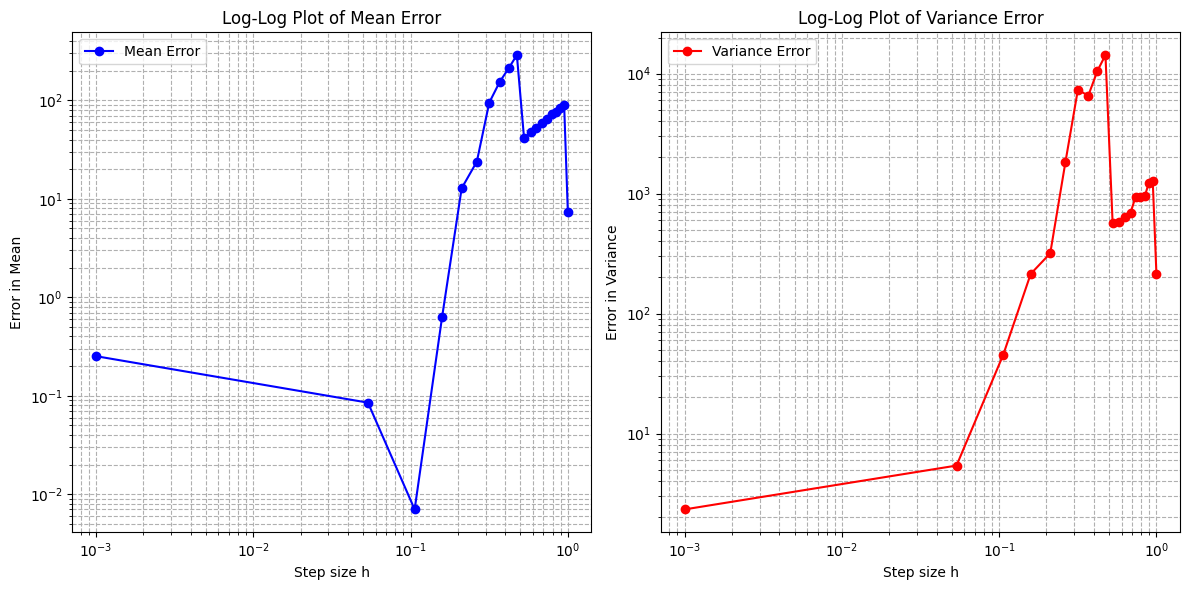

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plotting the error in the mean
ax1.loglog(H, abs(np.array(means) - true_mean), marker='o', linestyle='-', color='b', label='Mean Error')
ax1.set_title('Log-Log Plot of Mean Error')
ax1.set_xlabel('Step size h')
ax1.set_ylabel('Error in Mean')
ax1.grid(True, which="both", ls="--")  # Adding grid for better readability
ax1.legend()

# Plotting the error in the variance
ax2.loglog(H, abs(np.array(vars) - true_var), marker='o', linestyle='-', color='r', label='Variance Error')
ax2.set_title('Log-Log Plot of Variance Error')
ax2.set_xlabel('Step size h')
ax2.set_ylabel('Error in Variance')
ax2.grid(True, which="both", ls="--")  # Adding grid for better readability
ax2.legend()

# Tight layout often improves the spacing between subplots
plt.tight_layout()
plt.show()
